# || The Sparks Foundation ||   GRIPNOV20         DSBA TASK-2

## Author: Sneha Menon

## Topic: Prediction using unsupervised ML

### Task Objective : To predict the optimum no. of clusters and to present it visually

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                         #Importing necessary libraries
import seaborn as sns

In [45]:
iris = datasets.load_iris()                                   #loading dataset
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
df.head(10)                                                  #loading the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### To Find the optimum number of clusters for kmeans classification

In [10]:
x = df.iloc[:,[0,1,2,3]].values

In [13]:
from sklearn.cluster import KMeans

In [23]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)            #to calculate squared errors for clustered points

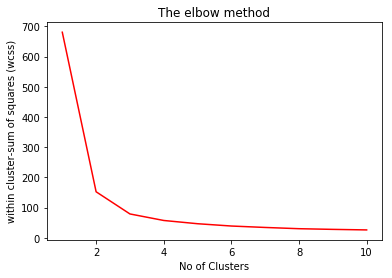

In [24]:
plt.plot(range(1,11),wss,c='red')
plt.title('The elbow method')                                  #plot the line graph to observe 
plt.xlabel('No of Clusters')                                   # 'The elbow'
plt.ylabel('within cluster-sum of squares (wcss)')
plt.show()

In [27]:
kmeans= KMeans(n_clusters=3,init='k-means++',max_iter=300,
               n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)                                 #applying kmeans to the dataset

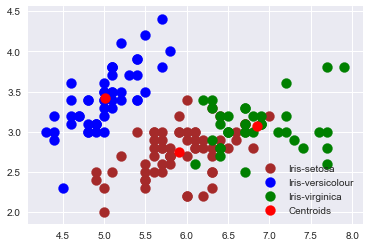

In [43]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],                 #plotting the clusters
            s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],       #plotting the centroids
            s = 100, c = 'red', label = 'Centroids')
plt.legend()